<a href="https://colab.research.google.com/github/tolgarenochka/dls_1/blob/main/hw_1_game_of_thrones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

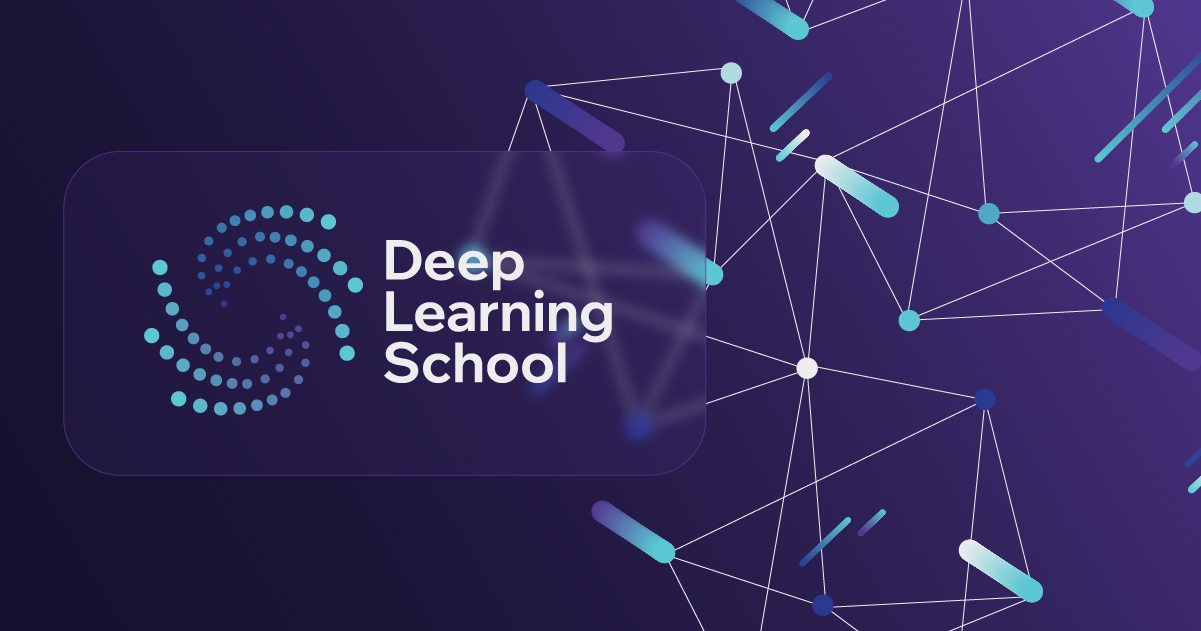

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

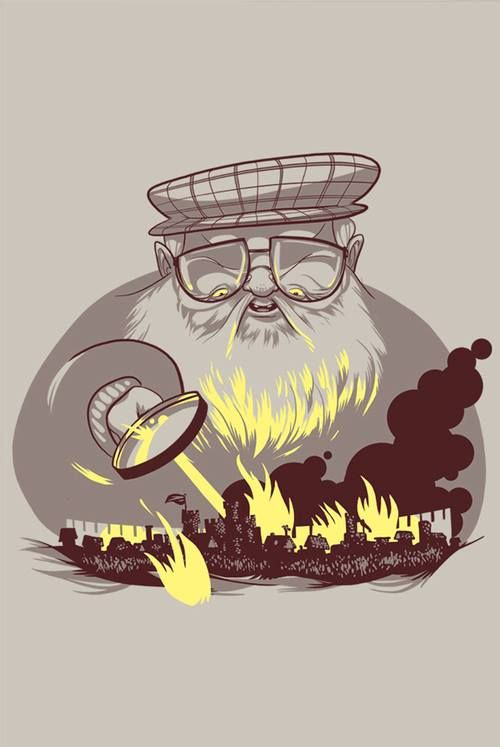

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.65$ --- 5 баллов

2) $0.65 > score \geqslant 0.50$ --- 4 балла

3) $0.50 > score \geqslant 0.45$ --- 3 балла

4) $0.45 > score \geqslant 0.40$ --- 2 балла

5) $0.40 > score \geqslant 0.35$ --- 1 балл

6) $0.35 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [ ]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 78.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 3.69MB/s]


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [ ]:
data = pd.read_csv('/content/game_of_thrones_train.csv', index_col='S.No')
data

name                 title  male     culture  \
S.No                                                                 
1     Viserys II Targaryen                   NaN     1         NaN   
2              Walder Frey  Lord of the Crossing     1    Rivermen   
3             Addison Hill                   Ser     1         NaN   
4              Aemma Arryn                 Queen     0         NaN   
5           Sylva Santagar            Greenstone     0     Dornish   
...                    ...                   ...   ...         ...   
1553                Marwyn           Archmaester     1         NaN   
1554          Masha Heddle                   NaN     0         NaN   
1555      Matthos Seaworth                   NaN     1         NaN   
1556            Meera Reed                   NaN     0  Crannogmen   
1557    Melara Hetherspoon                   NaN     0         NaN   

      dateOfBirth              mother            father                heir  \
S.No                                                                          
1             NaN  Rhaenyra Targaryen  Daemon Targaryen  Aegon IV Targaryen   
2           208.0                 NaN               NaN                 NaN   
3             NaN                 NaN               NaN                 NaN   
4            82.0                 NaN               NaN                 NaN   
5           276.0                 NaN               NaN                 NaN   
...           ...                 ...               ...                 ...   
1553          NaN                 NaN               NaN                 NaN   
1554          NaN                 NaN               NaN                 NaN   
1555          NaN                 NaN               NaN                 NaN   
1556        283.0                 NaN               NaN                 NaN   
1557        264.0                 NaN               NaN                 NaN   

                  house               spouse  ...  isAliveMother  \
S.No                                          ...                  
1                   NaN                  NaN  ...            1.0   
2            House Frey          Perra Royce  ...            NaN   
3           House Swyft                  NaN  ...            NaN   
4           House Arryn  Viserys I Targaryen  ...            NaN   
5        House Santagar      Eldon Estermont  ...            NaN   
...                 ...                  ...  ...            ...   
1553                NaN                  NaN  ...            NaN   
1554                NaN                  NaN  ...            NaN   
1555     House Seaworth                  NaN  ...            NaN   
1556         House Reed                  NaN  ...            NaN   
1557  House Hetherspoon                  NaN  ...            NaN   

      isAliveFather  isAliveHeir  isAliveSpouse  isMarried  isNoble   age  \
S.No                                                                        
1               0.0          0.0            NaN          0        0   NaN   
2               NaN          NaN            1.0          1        1  97.0   
3               NaN          NaN            NaN          0        1   NaN   
4               NaN          NaN            0.0          1        1  23.0   
5               NaN          NaN            1.0          1        1  29.0   
...             ...          ...            ...        ...      ...   ...   
1553            NaN          NaN            NaN          0        1   NaN   
1554            NaN          NaN            NaN          0        0   NaN   
1555            NaN          NaN            NaN          0        0   NaN   
1556            NaN          NaN            NaN          0        0  22.0   
1557            NaN          NaN            NaN          0        0  12.0   

      numDeadRelations  popularity  isAlive  
S.No                                         
1                   11    0.605351        0  
2                    1    0.896321        1  
3           

Посмотрите, какие типы данных представлены в нашем датасете

Знакомый нам метод describe() возвращает различную информацию для столбцов с числовыми типами данных, и с типами данных *object*

Давайте посмотрим на вывод для типа данных *object*. Для этого:
- сначала применим метод describe(). Укажем в качестве аргумента тип данных столбцов, статистику по которым мы хотим посмотреть (см. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html)
- для удобства восприятия транспонируем таблицу

In [ ]:
data.describe(include = 'object').T

count unique                  top freq
name     1557   1557   Melara Hetherspoon    1
title     717    195                  Ser  306
culture   488     51             Northmen   94
mother     18     16   Rhaenyra Targaryen    2
father     22     19     Daemon Targaryen    2
heir       21     20  Jaehaerys Targaryen    2
house    1176    315           House Frey   89
spouse    200    186          Walder Frey    6

Теперь давайте посмотрим на столбцы с числовыми типами данных. Дополните код ниже. Для удобства восприятия мы транспонировали таблицу и ограничили вывод тремя столбцами - количество строк без NaN, максимальное и минимальное значение (о кастомизации вариантах вывода describe() вы можете почитать в документации по ссылке выше).


In [ ]:
data.describe(include = ['float64', 'int64']).T[['count', 'min', 'max']]

count   min    max
male              1557.0   0.0    1.0
dateOfBirth        279.0 -25.0  299.0
book1             1557.0   0.0    1.0
book2             1557.0   0.0    1.0
book3             1557.0   0.0    1.0
book4             1557.0   0.0    1.0
book5             1557.0   0.0    1.0
isAliveMother       18.0   0.0    1.0
isAliveFather       22.0   0.0    1.0
isAliveHeir         21.0   0.0    1.0
isAliveSpouse      200.0   0.0    1.0
isMarried         1557.0   0.0    1.0
isNoble           1557.0   0.0    1.0
age                279.0   0.0  100.0
numDeadRelations  1557.0   0.0   15.0
popularity        1557.0   0.0    1.0
isAlive           1557.0   0.0    1.0

Так мы проверим, есть ли в данных неадекватнные значения.   Большинство числовых столбцов - это числа от 0 до 1. Отрицательные значения `dateOfBirth` не являются ошибкой. Значения age и `numDeadRelations` также выглядят адекватными. Можно переходить к дальнейшим шагам анализа (анонс - а в тестовых данных нас будет ждать сюрприз).

**Задание 1.3.** Предобработка (очистка) данных.

В нашем домашнем задании все пропуски в данных (missing values) уже закодированы как NaN. Проанализируйте, в каких колонках и как часто встречаются NaN значения. Далее вам надо будет принять решение, как их обрабатывать.

In [ ]:
data.isna().sum(axis=0)

name                   0
title                840
male                   0
culture             1069
dateOfBirth         1278
mother              1539
father              1535
heir                1536
house                381
spouse              1357
book1                  0
book2                  0
book3                  0
book4                  0
book5                  0
isAliveMother       1539
isAliveFather       1535
isAliveHeir         1536
isAliveSpouse       1357
isMarried              0
isNoble                0
age                 1278
numDeadRelations       0
popularity             0
isAlive                0
dtype: int64

В этом задании удалять строки с NaN (dropna) мы не будем по следующим причинам:
- в обучающем датасете много признаков с большим количество пропусков. Если удалять все строки с NaN, то размер выборки сильно уменьшится. Мы потеряем много данных, которые можно было бы использовать для построения более точной модели.
- тестовом датасете также много признаков с NaN (вы можете в этом убедиться, если скачаете датасет и совершите с ним те же действия, что выше проделали с обучаюшим датасетом). Поэтому нам все-равно придется придумать способ кодировать NaN, чтобы модель делала прогнозы для всех персонажей из тестового датасета. Для этого нам потребуется сохранять, а не удалять данные в обучающем датасете.     



Как вы могли заметить, в наших данных очень много пропущенных значений, причём в некоторых случая пропущена **большая** часть значений. Поэтому заполнять по умолчанию медианой/средним/модой в данном случае - не самый лучший способ (однако, это довольно часто используемый метод заполнения, который может пригодиться вам в будущем)

Ниже мы посмотрим, как можно работать с признаками с большим количеством пропущенных значений.

**Задание 1.4.** Числовые признаки

У нас есть **признак popularity**. Постройте гистограмму распределения данного признака с количеством интервалов (bins), равным 50 (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html)

(array([628., 337., 161., 116.,  67.,  41.,  56.,  32.,  27.,   9.,   8.,
         10.,   5.,   9.,   3.,   3.,   1.,   4.,   3.,   0.,   2.,   2.,
          0.,   3.,   3.,   1.,   0.,   0.,   2.,   0.,   1.,   2.,   1.,
          2.,   0.,   1.,   2.,   1.,   1.,   0.,   0.,   0.,   1.,   0.,
          1.,   0.,   0.,   0.,   1.,  10.]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <BarContainer object of 50 artists>)

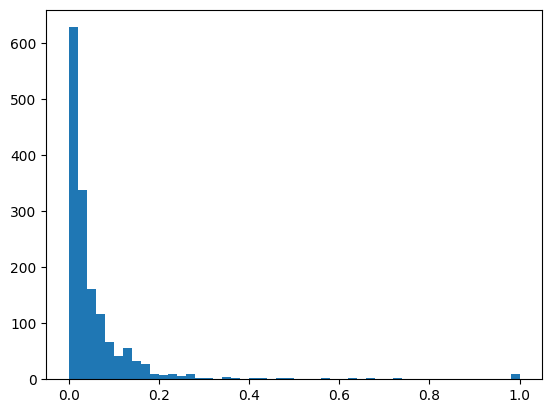

In [ ]:
plt.hist(data['popularity'], bins=50)

Распределение сильно несимметрично. Можно преобразовать данный признак, например, по формуле `np.log10(data["popularity"]*M+1)` (добавляем 1 ради логарифма, так как для нектоторых персонажей `popularity==0`). В качестве M можно попробовать, например, M=100 или другое число.

При желании для `popularity` вы можете использовать свой способ шкалирования признаков с несимметричным распределением.


(array([ 82.,   0.,   0.,   0.,  87.,   0., 113.,   0.,   0., 102., 126.,
          0., 118.,  81.,   0.,  82.,  69.,  74.,  31.,  27.,  70.,  48.,
         39.,  44.,  35.,  44.,  25.,  32.,  16.,  30.,  39.,  24.,  25.,
         10.,   7.,  12.,   7.,  10.,   3.,   5.,   3.,   4.,   4.,   3.,
          2.,   4.,   4.,   3.,   2.,  11.]),
 array([0.        , 0.04357954, 0.08715908, 0.13073862, 0.17431816,
        0.21789769, 0.26147723, 0.30505677, 0.34863631, 0.39221585,
        0.43579539, 0.47937493, 0.52295447, 0.56653401, 0.61011355,
        0.65369308, 0.69727262, 0.74085216, 0.7844317 , 0.82801124,
        0.87159078, 0.91517032, 0.95874986, 1.0023294 , 1.04590893,
        1.08948847, 1.13306801, 1.17664755, 1.22022709, 1.26380663,
        1.30738617, 1.35096571, 1.39454525, 1.43812479, 1.48170432,
        1.52528386, 1.5688634 , 1.61244294, 1.65602248, 1.69960202,
        1.74318156, 1.7867611 , 1.83034064, 1.87392017, 1.91749971,
        1.96107925, 2.00465879, 2.04823833, 2.

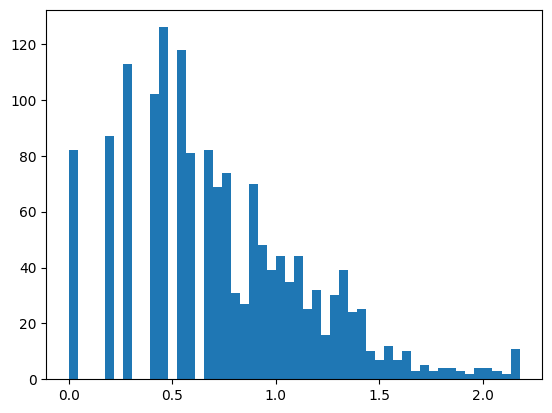

In [ ]:
plt.hist(np.log10(data["popularity"]*150+1), bins=50)

В качестве альтернативного подхода вы можете попробовать дискретизацию признака popularity на основе квантилей (quantile binning), используя функцию qcut() (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html). В этом случае вы преобразуете числовой признак popularity в категориальный, для которого в дальнейшем надо будет применить one-hot кодирование.

Теперь давайте обработаем **признак numDeadRelations**.
Посмотрите на частотное распределение этого признака. Лишь для малого числа персонажей `numDeadRelations>0`.

Создайте признак `boolDeadRelations`. Давайте упростим признак `numDeadRelations`, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. `numDeadRelations > 0`, и те, у которых не было, т.е. `numDeadRelations = 0`.

In [ ]:
data['boolDeadRelations'] = [1 if x != 0 else 0 for x in data['numDeadRelations']]

data

name                 title  male     culture  \
S.No                                                                 
1     Viserys II Targaryen                   NaN     1         NaN   
2              Walder Frey  Lord of the Crossing     1    Rivermen   
3             Addison Hill                   Ser     1         NaN   
4              Aemma Arryn                 Queen     0         NaN   
5           Sylva Santagar            Greenstone     0     Dornish   
...                    ...                   ...   ...         ...   
1553                Marwyn           Archmaester     1         NaN   
1554          Masha Heddle                   NaN     0         NaN   
1555      Matthos Seaworth                   NaN     1         NaN   
1556            Meera Reed                   NaN     0  Crannogmen   
1557    Melara Hetherspoon                   NaN     0         NaN   

      dateOfBirth              mother            father                heir  \
S.No                                                                          
1             NaN  Rhaenyra Targaryen  Daemon Targaryen  Aegon IV Targaryen   
2           208.0                 NaN               NaN                 NaN   
3             NaN                 NaN               NaN                 NaN   
4            82.0                 NaN               NaN                 NaN   
5           276.0                 NaN               NaN                 NaN   
...           ...                 ...               ...                 ...   
1553          NaN                 NaN               NaN                 NaN   
1554          NaN                 NaN               NaN                 NaN   
1555          NaN                 NaN               NaN                 NaN   
1556        283.0                 NaN               NaN                 NaN   
1557        264.0                 NaN               NaN                 NaN   

                  house               spouse  ...  isAliveFather  isAliveHeir  \
S.No                                          ...                               
1                   NaN                  NaN  ...            0.0          0.0   
2            House Frey          Perra Royce  ...            NaN          NaN   
3           House Swyft                  NaN  ...            NaN          NaN   
4           House Arryn  Viserys I Targaryen  ...            NaN          NaN   
5        House Santagar      Eldon Estermont  ...            NaN          NaN   
...                 ...                  ...  ...            ...          ...   
1553                NaN                  NaN  ...            NaN          NaN   
1554                NaN                  NaN  ...            NaN          NaN   
1555     House Seaworth                  NaN  ...            NaN          NaN   
1556         House Reed                  NaN  ...            NaN          NaN   
1557  House Hetherspoon                  NaN  ...            NaN          NaN   

      isAliveSpouse  isMarried  isNoble   age  numDeadRelations  popularity  \
S.No                                                                          
1               NaN          0        0   NaN                11    0.605351   
2               1.0          1        1  97.0                 1    0.896321   
3               NaN          0        1   NaN                 0    0.267559   
4               0.0          1        1  23.0                 0    0.183946   
5               1.0          1        1  29.0                 0    0.043478   
...             ...        ...      ...   ...               ...         ...   
1553            NaN          0        1   NaN                 0    0.160535   
1554            NaN          0        0   NaN                 0    0.040134   
1555            NaN          0        0   NaN                 0    0.076923   
1556            NaN          0        0  22.0                 0    0.270903   
1557            NaN          0        0  12.0                 0    0.046823   

 

Наконец, давайте посмотрим на **признак age**. В нем очень много пропущенных значений. Для того, чтобы использовать в модели информацию о возрасте персонажа, мы создадим два новых признака: `age_value` и `age_no_data`

- Там где возраст указан, age_value принимает значение `age`, а `age_no_data` - значение 0.
- Там где возраст не указан, `age_value` принимает значение 0, а `age_no_data` - значение 1.  

Фактически, в переменной `age` мы заменяем NaN на 0, но одновременно добавляем в модель еще один бинарный признак `age_no_data`, несущий информацию о том, у каких персонажей не был указан возраст:        

In [ ]:
data['age_value'] = [0 if np.isnan(x) else x for x in data['age']]
data['age_no_data'] = [1 if np.isnan(x) else 0 for x in data['age']]

data

name                 title  male     culture  \
S.No                                                                 
1     Viserys II Targaryen                   NaN     1         NaN   
2              Walder Frey  Lord of the Crossing     1    Rivermen   
3             Addison Hill                   Ser     1         NaN   
4              Aemma Arryn                 Queen     0         NaN   
5           Sylva Santagar            Greenstone     0     Dornish   
...                    ...                   ...   ...         ...   
1553                Marwyn           Archmaester     1         NaN   
1554          Masha Heddle                   NaN     0         NaN   
1555      Matthos Seaworth                   NaN     1         NaN   
1556            Meera Reed                   NaN     0  Crannogmen   
1557    Melara Hetherspoon                   NaN     0         NaN   

      dateOfBirth              mother            father                heir  \
S.No                                                                          
1             NaN  Rhaenyra Targaryen  Daemon Targaryen  Aegon IV Targaryen   
2           208.0                 NaN               NaN                 NaN   
3             NaN                 NaN               NaN                 NaN   
4            82.0                 NaN               NaN                 NaN   
5           276.0                 NaN               NaN                 NaN   
...           ...                 ...               ...                 ...   
1553          NaN                 NaN               NaN                 NaN   
1554          NaN                 NaN               NaN                 NaN   
1555          NaN                 NaN               NaN                 NaN   
1556        283.0                 NaN               NaN                 NaN   
1557        264.0                 NaN               NaN                 NaN   

                  house               spouse  ...  isAliveSpouse  isMarried  \
S.No                                          ...                             
1                   NaN                  NaN  ...            NaN          0   
2            House Frey          Perra Royce  ...            1.0          1   
3           House Swyft                  NaN  ...            NaN          0   
4           House Arryn  Viserys I Targaryen  ...            0.0          1   
5        House Santagar      Eldon Estermont  ...            1.0          1   
...                 ...                  ...  ...            ...        ...   
1553                NaN                  NaN  ...            NaN          0   
1554                NaN                  NaN  ...            NaN          0   
1555     House Seaworth                  NaN  ...            NaN          0   
1556         House Reed                  NaN  ...            NaN          0   
1557  House Hetherspoon                  NaN  ...            NaN          0   

      isNoble   age  numDeadRelations  popularity  isAlive  boolDeadRelations  \
S.No                                                                            
1           0   NaN                11    0.605351        0                  1   
2           1  97.0                 1    0.896321        1                  1   
3           1   NaN                 0    0.267559        1                  0   
4           1  23.0                 0    0.183946        0                  0   
5           1  29.0                 0    0.043478        1                  0   
...       ...   ...               ...         ...      ...                ...   
1553        1   NaN                 0    0.160535        1                  0   
1554        0   NaN                 0    0.040134        0                  0   
1555        0   NaN                 0    0.076923        0                  0   
1556        0  22.0                 0    0.270903        1                  0   
1557        0  12.0                 0    0.046823        0                  0   

 

Этот способ чем-то похож на работу с категориальной переменными с пропущенными значениями, когда мы добавляем еще одну категорию no_data и заменяем NaN на значение этой категории.

Если вы заходите похожим образом образом обработать признак `dateOfBirth`, **обратите внимание**, что у одних и тех же персонажей не указан и возраст, и год рождения.
То есть созданные признаки `age_no_data` и `dateOfBirth_no_data` будут полностью совпадать, и в модель надо будет включать только один из признаков: или `age_no_data`, или `dateOfBirth_no_data`.

**Задание 1.5.** Категориальные признаки с большим количеством категорий

**Признак culture** содержит информацию о принадлежности к одному из народов во вселенной Игры Престолов.

Давайте посмотрим, какие значения принимает данный признак. По умолчанию метод `value_counts()` игнорирует пропуски в данных, поэтому используем этот метод с параметром **dropna** со значением **False** (см. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.value_counts.html)

In [ ]:
data['culture'].value_counts(dropna=False)

culture
NaN                        1069
Northmen                     94
Ironborn                     91
Free Folk                    45
Braavosi                     39
Valyrian                     28
Ghiscari                     17
Dornish                      17
Dothraki                     17
Reach                        13
Vale mountain clans          12
Rivermen                     10
Valemen                      10
northmen                      9
Westerman                     8
Free folk                     7
Tyroshi                       6
Qartheen                      5
Stormlands                    4
Summer Isles                  4
Astapori                      4
Westeros                      3
Dornishmen                    3
Ironmen                       3
Northern mountain clans       3
Westermen                     3
Lysene                        2
westermen                     2
Meereenese                    2
Myrish                        2
Crannogmen                    2
Sistermen                     2
First Men                     2
Lhazarene                     1
Norvoshi                      1
Qohor                         1
Braavos                       1
Ghiscaricari                  1
ironborn                      1
Andal                         1
Lyseni                        1
Qarth                         1
Andals                        1
Lhazareen                     1
Vale                          1
Wildling                      1
Dorne                         1
Pentoshi                      1
free folk                     1
Summer Islander               1
Westerlands                   1
Summer Islands                1
Name: count, dtype: int64

Из полученного частотного распределения видно, что для большого числа персонажей значения данного признака не указаны. Также есть много редких значений признака, которые в выборке повторяются один или несколько раз. Причина отчасти в том, что один и тот же народ упоминается в нашем датасете под разными названиями.

Данную проблему мы попытаемся решить, сгруппировав народы в более крупные категории. Так мы одновременно решим проблему того, что один и тот же народ назван в выборке разными способами.

Предоженный вариант группировки имеет определенную логику. Выделяются следующие группы:
- старые нации, которые уже не сущевали как отдельные народы на момент повествования основной линии повествования романов, но отдельные потомки могли еще быть живы
- народы, проживающие в королевствах континента Весторос (для каждого королевства - своя группа)
- народы континента Эссос
- прочие народы

In [ ]:
cultures_grouped = {
    'Old Nations': ['valyrian', 'first men', 'andal', 'andals', 'rhoynar'],
    'the North': ['northmen', 'northern mountain clans', 'crannogmen'],
    'the Iron Islands': ['ironborn', 'ironborn', 'ironmen'],
    'the Mountain and the Vale': ['valemen', 'vale', 'vale mountain clans',
                              'sistermen'],
    'the Isles and Rivers': ['riverlands', 'rivermen'],
    'the Rock': ['westerman', 'westermen', 'westerlands'],
    'the Stormlands': ['stormlander', 'stormlands'],
    'the Reach': ['reach', 'reachmen', 'the reach'],
    'Dorne': ['dornish', 'dornishmen', 'dorne'],
    'Essos Nations': ['astapor', 'astapori', 'braavosi', 'braavos', 'tyroshi', 'lysene', 'lyseni',
                      'myrish', 'pentoshi', 'qartheen', 'qarth', 'dothraki',
                      'lhazarene', 'lhazareen','meereen', 'meereenese',
                      'norvoshi', 'qohor', 'summer isles', 'summer islands',
                      'summer islander', 'asshai', "asshai'i", 'norvos', 'ghiscari',
                      'ghiscaricari'],
    'Other Nations': ['ibbenese', 'westeros', 'free folk', 'wildling', 'wildlings', 'naathi']}

**Обратите внимание, что некоторые варианты названий народов встречаются только в тестовых данных, и не встречаются в обучающих данных.** Такая ситуация нередко случается на практике. Поэтому, после обработки обучающих данных и обучения модели важно задать для модели правило, как она должна обрабатывать "незнакомые" категории в категориальных признаках. Например, можно относить объекты с "незнакомой" категорией к некоторой существующей категории или указать формулу расчета для "незнакомой" категории.     

Предложенный вам словарь `cultures_grouped` составлен по всем значениям признака `culture`, встречающимся в тренировочном либо в тестовом датасете. Здесь важно, что все укрупненные категории (ключи/keys словаря `cultures_grouped`) представлены в обоих датасетах, а уникальные для тестового датасета названия народов - это отдельные названия народов внутри укрупненных категорий (значения/values словаря). Поэтому, когда вы будете работать с тестовыми - просто применяйте этот словарь без указания правила обработки "незнакомых" категорий.

Давайте приступим к кодировке значений признака culture.
Для этого сначала инвертируем словарь *cultures_grouped*

In [ ]:
#Довольно просто инвертировать словарь, где ключу соответствует одно значение
#В нашем случае ключу соответствует список значений.
#Ниже показан пример, как можно инвертировать такой словарь

d = {'A': ['a1', 'a2', 'a3'],
     'B': ['b1', 'b2', 'b3', 'b4']}

d_inverted = {}
for k in d.keys():
  for v in d[k]:
      d_inverted.update({v:k})

d_inverted

{'a1': 'A', 'a2': 'A', 'a3': 'A', 'b1': 'B', 'b2': 'B', 'b3': 'B', 'b4': 'B'}

In [ ]:
# По аналогии с примером выше инвертируйте словарь cultures_grouped
cultures_grouped_inverted = {}
for group in cultures_grouped.keys():
  for culture in cultures_grouped[group]:
    cultures_grouped_inverted.update({culture:group})

cultures_grouped_inverted

{'valyrian': 'Old Nations',
 'first men': 'Old Nations',
 'andal': 'Old Nations',
 'andals': 'Old Nations',
 'rhoynar': 'Old Nations',
 'northmen': 'the North',
 'northern mountain clans': 'the North',
 'crannogmen': 'the North',
 'ironborn': 'the Iron Islands',
 'ironmen': 'the Iron Islands',
 'valemen': 'the Mountain and the Vale',
 'vale': 'the Mountain and the Vale',
 'vale mountain clans': 'the Mountain and the Vale',
 'sistermen': 'the Mountain and the Vale',
 'riverlands': 'the Isles and Rivers',
 'rivermen': 'the Isles and Rivers',
 'westerman': 'the Rock',
 'westermen': 'the Rock',
 'westerlands': 'the Rock',
 'stormlander': 'the Stormlands',
 'stormlands': 'the Stormlands',
 'reach': 'the Reach',
 'reachmen': 'the Reach',
 'the reach': 'the Reach',
 'dornish': 'Dorne',
 'dornishmen': 'Dorne',
 'dorne': 'Dorne',
 'astapor': 'Essos Nations',
 'astapori': 'Essos Nations',
 'braavosi': 'Essos Nations',
 'braavos': 'Essos Nations',
 'tyroshi': 'Essos Nations',
 'lysene': 'Essos Na

Теперь создадим новый столбец с укрупненными значениями culture.

Для этого будем использовать метод `map()` с инвертированным словарем в качестве аргумента (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.map.html)

Обратите внимание, что в словаре названия народов указаны в нижнем регистре. А в датасете используется как нижний, так и верхний регистр. Поэтому перед применением метода `map()` переведем значения столбца culture в нижний регистр при помощи метода `str.lower()` (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.lower.html).

In [ ]:
data['culture_grouped'] = data['culture'].str.lower().map(cultures_grouped_inverted)

Осталось заменить все NaN в созданном столбце на категорию `culture_no_data`:

In [ ]:
data['culture_no_data'] = [1 if x is np.nan else 0 for x in data['culture']]

data

name                 title  male     culture  \
S.No                                                                 
1     Viserys II Targaryen                   NaN     1         NaN   
2              Walder Frey  Lord of the Crossing     1    Rivermen   
3             Addison Hill                   Ser     1         NaN   
4              Aemma Arryn                 Queen     0         NaN   
5           Sylva Santagar            Greenstone     0     Dornish   
...                    ...                   ...   ...         ...   
1553                Marwyn           Archmaester     1         NaN   
1554          Masha Heddle                   NaN     0         NaN   
1555      Matthos Seaworth                   NaN     1         NaN   
1556            Meera Reed                   NaN     0  Crannogmen   
1557    Melara Hetherspoon                   NaN     0         NaN   

      dateOfBirth              mother            father                heir  \
S.No                                                                          
1             NaN  Rhaenyra Targaryen  Daemon Targaryen  Aegon IV Targaryen   
2           208.0                 NaN               NaN                 NaN   
3             NaN                 NaN               NaN                 NaN   
4            82.0                 NaN               NaN                 NaN   
5           276.0                 NaN               NaN                 NaN   
...           ...                 ...               ...                 ...   
1553          NaN                 NaN               NaN                 NaN   
1554          NaN                 NaN               NaN                 NaN   
1555          NaN                 NaN               NaN                 NaN   
1556        283.0                 NaN               NaN                 NaN   
1557        264.0                 NaN               NaN                 NaN   

                  house               spouse  ...  isNoble   age  \
S.No                                          ...                  
1                   NaN                  NaN  ...        0   NaN   
2            House Frey          Perra Royce  ...        1  97.0   
3           House Swyft                  NaN  ...        1   NaN   
4           House Arryn  Viserys I Targaryen  ...        1  23.0   
5        House Santagar      Eldon Estermont  ...        1  29.0   
...                 ...                  ...  ...      ...   ...   
1553                NaN                  NaN  ...        1   NaN   
1554                NaN                  NaN  ...        0   NaN   
1555     House Seaworth                  NaN  ...        0   NaN   
1556         House Reed                  NaN  ...        0  22.0   
1557  House Hetherspoon                  NaN  ...        0  12.0   

      numDeadRelations  popularity  isAlive  boolDeadRelations  age_value  \
S.No                                                                        
1                   11    0.605351        0                  1        0.0   
2                    1    0.896321        1                  1       97.0   
3                    0    0.267559        1                  0        0.0   
4                    0    0.183946        0                  0       23.0   
5                    0    0.043478        1                  0       29.0   
...                ...         ...      ...                ...        ...   
1553                 0    0.160535        1                  0        0.0   
1554                 0    0.040134        0                  0        0.0   
1555                 0    0.076923        0                  0        0.0   
1556                 0    0.270903        1                  0       22.0   
1557                 0    0.046823        0                  0       12.0   

      age_no_data       culture_grouped  culture_no_data  
S.No                                                      
1               1                   NaN                1  
2               0  

Распределение сгруппированной переменной выглядит гораздо лучше. Но по прежнему есть несколько слабо представленых групп.

Дальнейшую работу с этим признаком проводите на свое усмотрение для повышения качества прогноза модели. Например, можно объединить несколько слабо представленных категорий в одну или применить другой подход.

**Задание 1.6.** Категориальные признаки в линейных моделях

Для включения категориальных признаков в линейную модель их нужно преобразовать в числовые признаки.

Если признак принимает одно из двух возможных значений (например, персонаж "появляется" или "не появляется" в 1-й книге), он напрямую кодируется в бинарный признак ("появляется" -> 1, "не появляется" -> 0). Если признак принимает больше двух значений, его можно преобразовать в несколько бинарных при помощи one-hot преобразования. В некоторых случаях бывает полезно объединить некоторые категории, как мы это поступили с признаком *culture*.

Порядковых признаков у нас в задаче нет, поэтому рассматривать их здесь мы не будем.

Для того, чтобы найти все порядковые признаки, посмотрим на количество уникальных значений, которые встречаются в столбцах. Для столбцов с типом object количество уникальных значений мы выводили  при помощи метода `describe()` в задании 1.2.

Чтобы посмотреть количество уникальных значений для всех столбцов, можно воспользоваться методом nunique() (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html)

In [ ]:
# Количество уникальнх значений в каждом столбце
data.nunique()

name                 1557
title                 195
male                    2
culture                51
dateOfBirth           105
mother                 16
father                 19
heir                   20
house                 315
spouse                186
book1                   2
book2                   2
book3                   2
book4                   2
book5                   2
isAliveMother           2
isAliveFather           2
isAliveHeir             2
isAliveSpouse           2
isMarried               2
isNoble                 2
age                    72
numDeadRelations       14
popularity            117
isAlive                 2
boolDeadRelations       2
age_value              72
age_no_data             2
culture_grouped        11
culture_no_data         2
dtype: int64

In [ ]:
# Для числовых столбцов можно вывести в одну таблицу более детальную статистику, объединив выводы describe() и nunique()
# Код ниже требуется дополнить по аналогии с заданием 1.2.
data.describe(include = ['float64', 'int']).T[['count', 'min', 'max']].assign(N_unique_values = data.nunique())

count   min    max  N_unique_values
male               1557.0   0.0    1.0                2
dateOfBirth         279.0 -25.0  299.0              105
book1              1557.0   0.0    1.0                2
book2              1557.0   0.0    1.0                2
book3              1557.0   0.0    1.0                2
book4              1557.0   0.0    1.0                2
book5              1557.0   0.0    1.0                2
isAliveMother        18.0   0.0    1.0                2
isAliveFather        22.0   0.0    1.0                2
isAliveHeir          21.0   0.0    1.0                2
isAliveSpouse       200.0   0.0    1.0                2
isMarried          1557.0   0.0    1.0                2
isNoble            1557.0   0.0    1.0                2
age                 279.0   0.0  100.0               72
numDeadRelations   1557.0   0.0   15.0               14
popularity         1557.0   0.0    1.0              117
isAlive            1557.0   0.0    1.0                2
boolDeadRelations  1557.0   0.0    1.0                2
age_value          1557.0   0.0  100.0               72
age_no_data        1557.0   0.0    1.0                2
culture_no_data    1557.0   0.0    1.0                2

Посмотрев на количество уникальных значений мы можем выделить категориальные признаки. Например, `popularity` принимает значения от 0 до 1, но это непрерывный числовой признак. Остальные признаки со значениями от 0 до 1 - принимают только два значения, то есть являются бинарными.

Бинарные признаки без NaN полностью готовы для включения в модель. Некоторые бинарные признаки содержат пропуски, поэтому, если вы захотите включить их в модель, их потребуется обработать.

Для бинарных признаков их связь с зависимой переменной можно прикинуть по таблице корреляций. Для категориальных признаков с количеством значений больше двух (или с двумя значениями и NaN) можно сделать one-hot преобразования и посчитать корреряцию зависимой переменной с набором сгенерированных бинарных признаков.
В качестве альтернативного подхода можно использовать сравнение средних значений зависимой переменной для разных категорий исследуемого признака. Чем сильнее различаются средние значения целевой переменной между категориями, тем вероятнее, что данный признак связан с зависимой переменной.

In [ ]:
# попробуйте провести сравнение средних зависимой пременной isAlive для признака isAliveSpouse
# одним из приведенных ниже способов:

data.groupby('boolDeadRelations', dropna = False)['isAlive'].mean()
pd.pivot_table(data = data, values = 'isAlive', index = 'boolDeadRelations', aggfunc=['mean', 'count'], dropna=False)

mean   count
                    isAlive isAlive
boolDeadRelations                  
0                  0.794355    1488
1                  0.434783      69

In [ ]:

data.groupby('age_no_data', dropna = False)['isAlive'].mean()
pd.pivot_table(data = data, values = 'isAlive', index = 'age_no_data', aggfunc=['mean', 'count'], dropna=False)

mean   count
              isAlive isAlive
age_no_data                  
0            0.677419     279
1            0.800469    1278

In [ ]:
data.groupby('culture_no_data', dropna = False)['isAlive'].mean()
pd.pivot_table(data = data, values = 'isAlive', index = 'culture_no_data', aggfunc=['mean', 'count'], dropna=False)

mean   count
                  isAlive isAlive
culture_no_data                  
0                0.772541     488
1                0.781104    1069

In [ ]:
data.groupby('isNoble', dropna = False)['isAlive'].mean()
pd.pivot_table(data = data, values = 'isAlive', index = 'isNoble', aggfunc=['mean', 'count'], dropna=False)

mean   count
          isAlive isAlive
isNoble                  
0        0.800687     873
1        0.750000     684

In [ ]:
data.groupby('isMarried', dropna = False)['isAlive'].mean()
pd.pivot_table(data = data, values = 'isAlive', index = 'isMarried', aggfunc=['mean', 'count'], dropna=False)

mean   count
            isAlive isAlive
isMarried                  
0          0.786293    1357
1          0.725000     200

In [ ]:
data.groupby('isAliveSpouse', dropna = False)['isAlive'].mean()
pd.pivot_table(data = data, values = 'isAlive', index = 'isAliveSpouse', aggfunc=['mean', 'count'], dropna=False)

mean   count
                isAlive isAlive
isAliveSpouse                  
0.0            0.619048      42
1.0            0.753165     158
NaN            0.786293    1357

In [ ]:
# много нанов - преобразуем признак

data['isAliveSpouse_value'] = data['isAliveSpouse'].apply(lambda x: 1 if x == 1 else 0)
data['isAliveSpouse_no_data'] = data['isAliveSpouse'].apply(lambda x: 1 if pd.isna(x) else 0)

In [ ]:
# много нанов - преобразуем признак

data.groupby('isAliveHeir', dropna = False)['isAlive'].mean()
pd.pivot_table(data = data, values = 'isAlive', index = 'isAliveHeir', aggfunc=['mean', 'count'], dropna=False)

mean   count
              isAlive isAlive
isAliveHeir                  
0.0          0.000000       7
1.0          0.357143      14
NaN          0.785807    1536

In [ ]:
# много нанов - преобразуем признак

data['isAliveHeir_value'] = data['isAliveHeir'].apply(lambda x: 1 if x == 1 else 0)
data['isAliveHeir_no_data'] = data['isAliveHeir'].apply(lambda x: 1 if pd.isna(x) else 0)

In [ ]:
data.groupby('isAliveFather', dropna = False)['isAlive'].mean()
pd.pivot_table(data = data, values = 'isAlive', index = 'isAliveFather', aggfunc=['mean', 'count'], dropna=False)

mean   count
                isAlive isAlive
isAliveFather                  
0.0            0.235294      17
1.0            0.400000       5
NaN            0.785668    1535

In [ ]:
# много нанов - преобразуем признак

data['isAliveFather_value'] = data['isAliveFather'].apply(lambda x: 1 if x == 1 else 0)
data['isAliveFather_no_data'] = data['isAliveFather'].apply(lambda x: 1 if pd.isna(x) else 0)

In [ ]:
data.groupby('isAliveMother', dropna = False)['isAlive'].mean()
pd.pivot_table(data = data, values = 'isAlive', index = 'isAliveMother', aggfunc=['mean', 'count'], dropna=False)

mean   count
                isAlive isAlive
isAliveMother                  
0.0            0.166667       6
1.0            0.166667      12
NaN            0.785575    1539

In [ ]:
# много нанов - преобразуем признак

data['isAliveMother_value'] = data['isAliveMother'].apply(lambda x: 1 if x == 1 else 0)
data['isAliveMother_no_data'] = data['isAliveMother'].apply(lambda x: 1 if pd.isna(x) else 0)

In [ ]:
data.groupby('male', dropna = False)['isAlive'].mean()
pd.pivot_table(data = data, values = 'isAlive', index = 'male', aggfunc=['mean', 'count'], dropna=False)

mean   count
       isAlive isAlive
male                  
0     0.852433     637
1     0.727174     920

In [ ]:
# удалим признаки, которые мы преобразовали

data.drop(columns=['isAliveSpouse', 'isAliveHeir', 'isAliveMother','isAliveFather'], inplace=True)

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик. Не забудьте, что потом аналогичным образом вам надо будет преобразовывать тестовый датасет, используя тот же алгоритм кодирования признаков.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [ ]:
from sklearn.preprocessing import OneHotEncoder

categorical_columns = ['house', 'title', 'culture_grouped']

categorical_features = data[categorical_columns]

unprocessed_cat_features = categorical_features.select_dtypes(include=[object]).columns.tolist()

#Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Apply one-hot encoding to the categorical columns
one_hot_encoded = encoder.fit_transform(data[unprocessed_cat_features])

#Create a DataFrame with the one-hot encoded columns
#We use get_feature_names_out() to get the column names for the encoded data
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(unprocessed_cat_features), index=data.index)

data_encoded = pd.concat([data, one_hot_df], axis=1)
data_encoded = data_encoded.drop(unprocessed_cat_features, axis=1)

data_encoded


name  male     culture  dateOfBirth              mother  \
S.No                                                                            
1     Viserys II Targaryen     1         NaN          NaN  Rhaenyra Targaryen   
2              Walder Frey     1    Rivermen        208.0                 NaN   
3             Addison Hill     1         NaN          NaN                 NaN   
4              Aemma Arryn     0         NaN         82.0                 NaN   
5           Sylva Santagar     0     Dornish        276.0                 NaN   
...                    ...   ...         ...          ...                 ...   
1553                Marwyn     1         NaN          NaN                 NaN   
1554          Masha Heddle     0         NaN          NaN                 NaN   
1555      Matthos Seaworth     1         NaN          NaN                 NaN   
1556            Meera Reed     0  Crannogmen        283.0                 NaN   
1557    Melara Hetherspoon     0         NaN        264.0                 NaN   

                father                heir               spouse  book1  book2  \
S.No                                                                            
1     Daemon Targaryen  Aegon IV Targaryen                  NaN      0      0   
2                  NaN                 NaN          Perra Royce      1      1   
3                  NaN                 NaN                  NaN      0      0   
4                  NaN                 NaN  Viserys I Targaryen      0      0   
5                  NaN                 NaN      Eldon Estermont      0      0   
...                ...                 ...                  ...    ...    ...   
1553               NaN                 NaN                  NaN      1      0   
1554               NaN                 NaN                  NaN      1      1   
1555               NaN                 NaN                  NaN      0      1   
1556               NaN                 NaN                  NaN      0      1   
1557               NaN                 NaN                  NaN      0      0   

      ...  culture_grouped_Old Nations  culture_grouped_Other Nations  \
S.No  ...                                                               
1     ...                          0.0                            0.0   
2     ...                          0.0                            0.0   
3     ...                          0.0                            0.0   
4     ...                          0.0                            0.0   
5     ...                          0.0                            0.0   
...   ...                          ...                            ...   
1553  ...                          0.0                            0.0   
1554  ...                          0.0                            0.0   
1555  ...                          0.0                            0.0   
1556  ...                          0.0                            0.0   
1557  ...                          0.0                            0.0   

      culture_grouped_the Iron Islands  culture_grouped_the Isles and Rivers  \
S.No                                                                           
1                                  0.0                                   0.0   
2                                  0.0                                   1.0   
3                                  0.0                                   0.0   
4                                  0.0                                   0.0   
5                                  0.0                                   0.0   
...                                ...                                   ...   
1553                               0.0                                   0.0   
1554                               0.0                                   0.0   
1555                               0.0                                   0.0   
1556                               0.0                                   0.0   
1557

In [ ]:
# Для числовых столбцов можно вывести в одну таблицу более детальную статистику, объединив выводы describe() и nunique()
# Код ниже требуется дополнить по аналогии с заданием 1.2.
data.describe(include = ['float64', 'int']).T[['count', 'min', 'max']].assign(N_unique_values = data.nunique())

count   min    max  N_unique_values
male                   1557.0   0.0    1.0                2
dateOfBirth             279.0 -25.0  299.0              105
book1                  1557.0   0.0    1.0                2
book2                  1557.0   0.0    1.0                2
book3                  1557.0   0.0    1.0                2
book4                  1557.0   0.0    1.0                2
book5                  1557.0   0.0    1.0                2
isMarried              1557.0   0.0    1.0                2
isNoble                1557.0   0.0    1.0                2
age                     279.0   0.0  100.0               72
numDeadRelations       1557.0   0.0   15.0               14
popularity             1557.0   0.0    1.0              117
isAlive                1557.0   0.0    1.0                2
boolDeadRelations      1557.0   0.0    1.0                2
age_value              1557.0   0.0  100.0               72
age_no_data            1557.0   0.0    1.0                2
culture_no_data        1557.0   0.0    1.0                2
isAliveSpouse_value    1557.0   0.0    1.0                2
isAliveSpouse_no_data  1557.0   0.0    1.0                2
isAliveHeir_value      1557.0   0.0    1.0                2
isAliveHeir_no_data    1557.0   0.0    1.0                2
isAliveFather_value    1557.0   0.0    1.0                2
isAliveFather_no_data  1557.0   0.0    1.0                2
isAliveMother_value    1557.0   0.0    1.0                2
isAliveMother_no_data  1557.0   0.0    1.0                2

<Axes: >

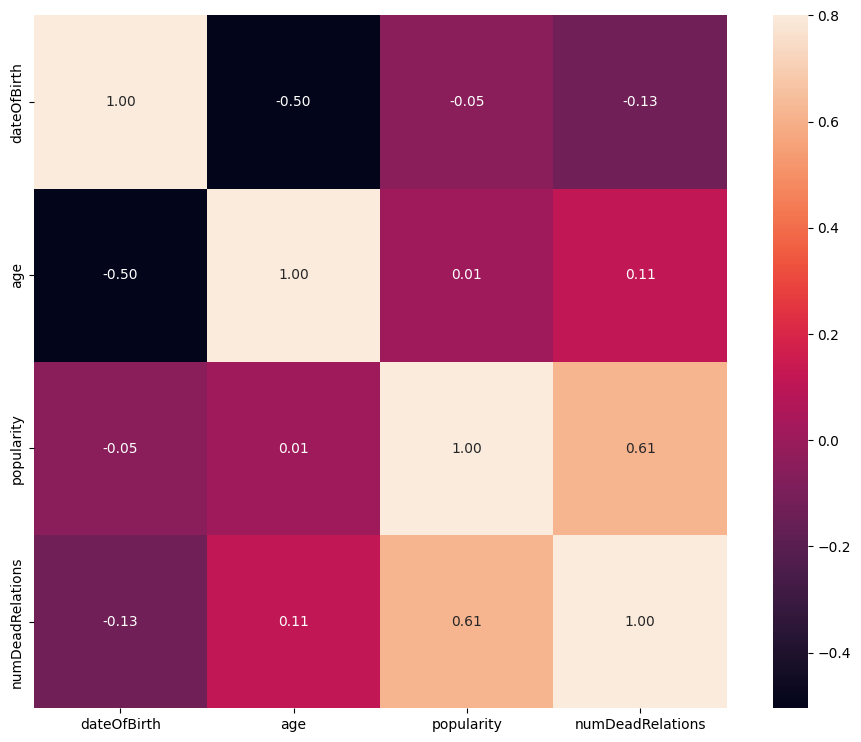

In [ ]:
numeric_features = data[['dateOfBirth', 'age', 'popularity','numDeadRelations']]

corrmat = numeric_features.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True, fmt='.2f', annot_kws={'size': 10})

In [ ]:
data_encoded.drop(columns=['numDeadRelations', 'age', 'culture', 'dateOfBirth'], inplace=True)

In [ ]:
data_encoded.drop(columns=['mother', 'father', 'heir', 'spouse', 'name'], inplace=True)

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

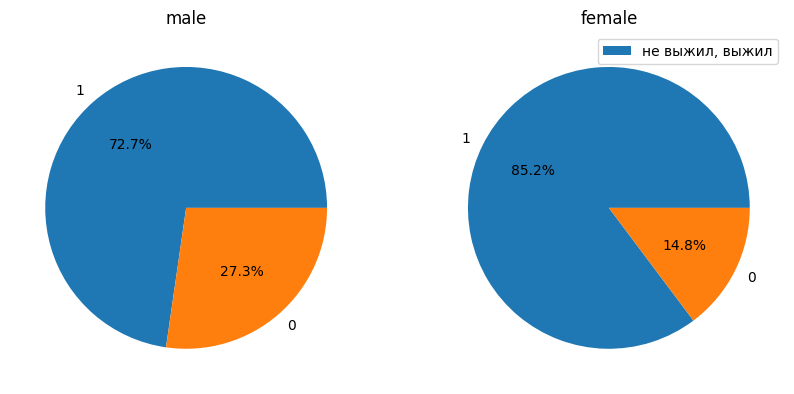

In [ ]:
# Готовим данные для графика
data1 = data_encoded[data_encoded['male'] == 1]['isAlive'].value_counts()
data2 = data_encoded[data_encoded['male'] == 0]['isAlive'].value_counts()

# Строим круговую диаграмму
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,8))

ax1.pie(data1.values, labels=data1.index, autopct='%1.1f%%')
ax2.pie(data2.values, labels=data2.index, autopct='%1.1f%%')

ax1.set_title("male")
ax2.set_title("female")

plt.legend(['не выжил, выжил'])

plt.show()

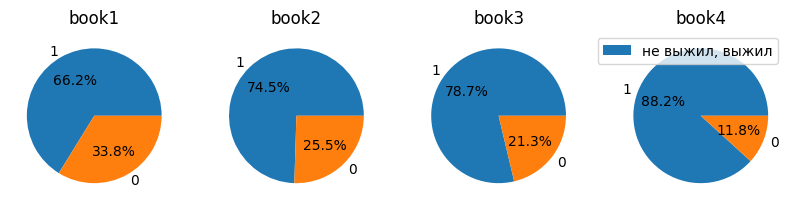

In [ ]:
# Готовим данные для графика
data1 = data_encoded[data_encoded['book1'] == 1]['isAlive'].value_counts()
data2 = data_encoded[data_encoded['book2'] == 1]['isAlive'].value_counts()
data3 = data_encoded[data_encoded['book3'] == 1]['isAlive'].value_counts()
data4 = data_encoded[data_encoded['book4'] == 1]['isAlive'].value_counts()

# Строим круговую диаграмму
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(10,8))

ax1.pie(data1.values, labels=data1.index, autopct='%1.1f%%')
ax2.pie(data2.values, labels=data2.index, autopct='%1.1f%%')
ax3.pie(data3.values, labels=data3.index, autopct='%1.1f%%')
ax4.pie(data4.values, labels=data4.index, autopct='%1.1f%%')

ax1.set_title("book1")
ax2.set_title("book2")
ax3.set_title("book3")
ax4.set_title("book4")

plt.legend(['не выжил, выжил'])

plt.show()

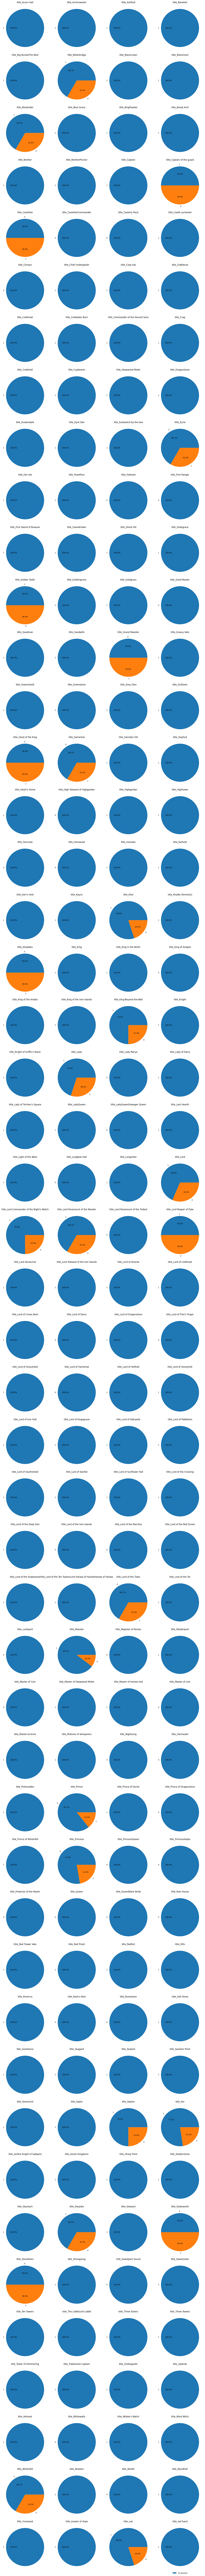

In [ ]:
import re

# Находим все колонки, которые начинаются с "title_"
title_columns = [col for col in data_encoded.columns if re.match(r'^title_', col)]

# Сортируем для единообразия (опционально)
title_columns.sort()

# Определяем layout для subplots
n = len(title_columns)
cols = 4  # Количество колонок в сетке графиков
rows = (n + cols - 1) // cols  # Вычисляем необходимое количество строк

# Создаем subplots
fig, axes = plt.subplots(rows, cols, figsize=(4*cols, 4*rows))

# Если axes не является массивом (когда rows=1), преобразуем в массив для единообразия
if rows == 1:
    axes = [axes]
if cols == 1:
    axes = [[ax] for ax in axes]

# Строим круговые диаграммы для каждого title_ признака
for i, title_col in enumerate(title_columns):
    row_idx = i // cols
    col_idx = i % cols

    # Получаем данные для текущего title_
    data = data_encoded[data_encoded[title_col] == 1]['isAlive'].value_counts()

    # Строим круговую диаграмму
    axes[row_idx][col_idx].pie(data.values, labels=data.index, autopct='%1.1f%%')
    axes[row_idx][col_idx].set_title(title_col)

# Скрываем пустые subplots, если они есть
for i in range(len(title_columns), rows * cols):
    row_idx = i // cols
    col_idx = i % cols
    axes[row_idx][col_idx].set_visible(False)

# Добавляем легенду
plt.legend(['не выжил', 'выжил'], loc='lower center', bbox_to_anchor=(0.5, -0.1))

plt.tight_layout()
plt.show()

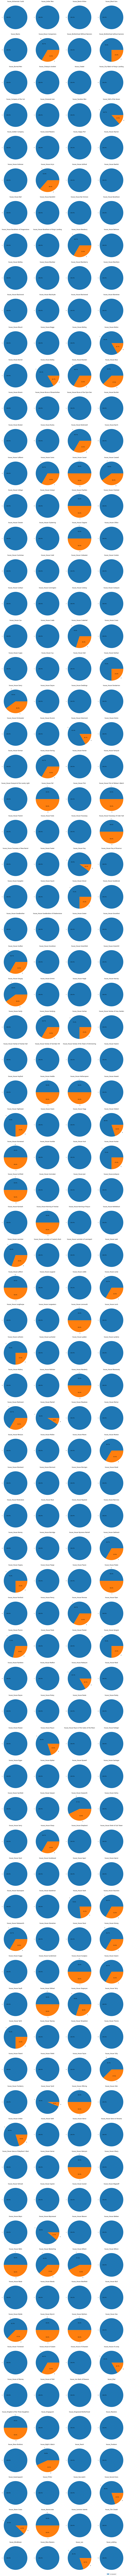

In [ ]:
# Находим все колонки, которые начинаются с "house"
title_columns = [col for col in data_encoded.columns if re.match(r'^house', col)]

# Сортируем для единообразия (опционально)
title_columns.sort()

# Определяем layout для subplots
n = len(title_columns)
cols = 4  # Количество колонок в сетке графиков
rows = (n + cols - 1) // cols  # Вычисляем необходимое количество строк

# Создаем subplots
fig, axes = plt.subplots(rows, cols, figsize=(4*cols, 4*rows))

# Если axes не является массивом (когда rows=1), преобразуем в массив для единообразия
if rows == 1:
    axes = [axes]
if cols == 1:
    axes = [[ax] for ax in axes]

# Строим круговые диаграммы для каждого title_ признака
for i, title_col in enumerate(title_columns):
    row_idx = i // cols
    col_idx = i % cols

    # Получаем данные для текущего title_
    data = data_encoded[data_encoded[title_col] == 1]['isAlive'].value_counts()

    # Строим круговую диаграмму
    axes[row_idx][col_idx].pie(data.values, labels=data.index, autopct='%1.1f%%')
    axes[row_idx][col_idx].set_title(title_col)

# Скрываем пустые subplots, если они есть
for i in range(len(title_columns), rows * cols):
    row_idx = i // cols
    col_idx = i % cols
    axes[row_idx][col_idx].set_visible(False)

# Добавляем легенду
plt.legend(['не выжил', 'выжил'], loc='lower center', bbox_to_anchor=(0.5, -0.1))

plt.tight_layout()
plt.show()

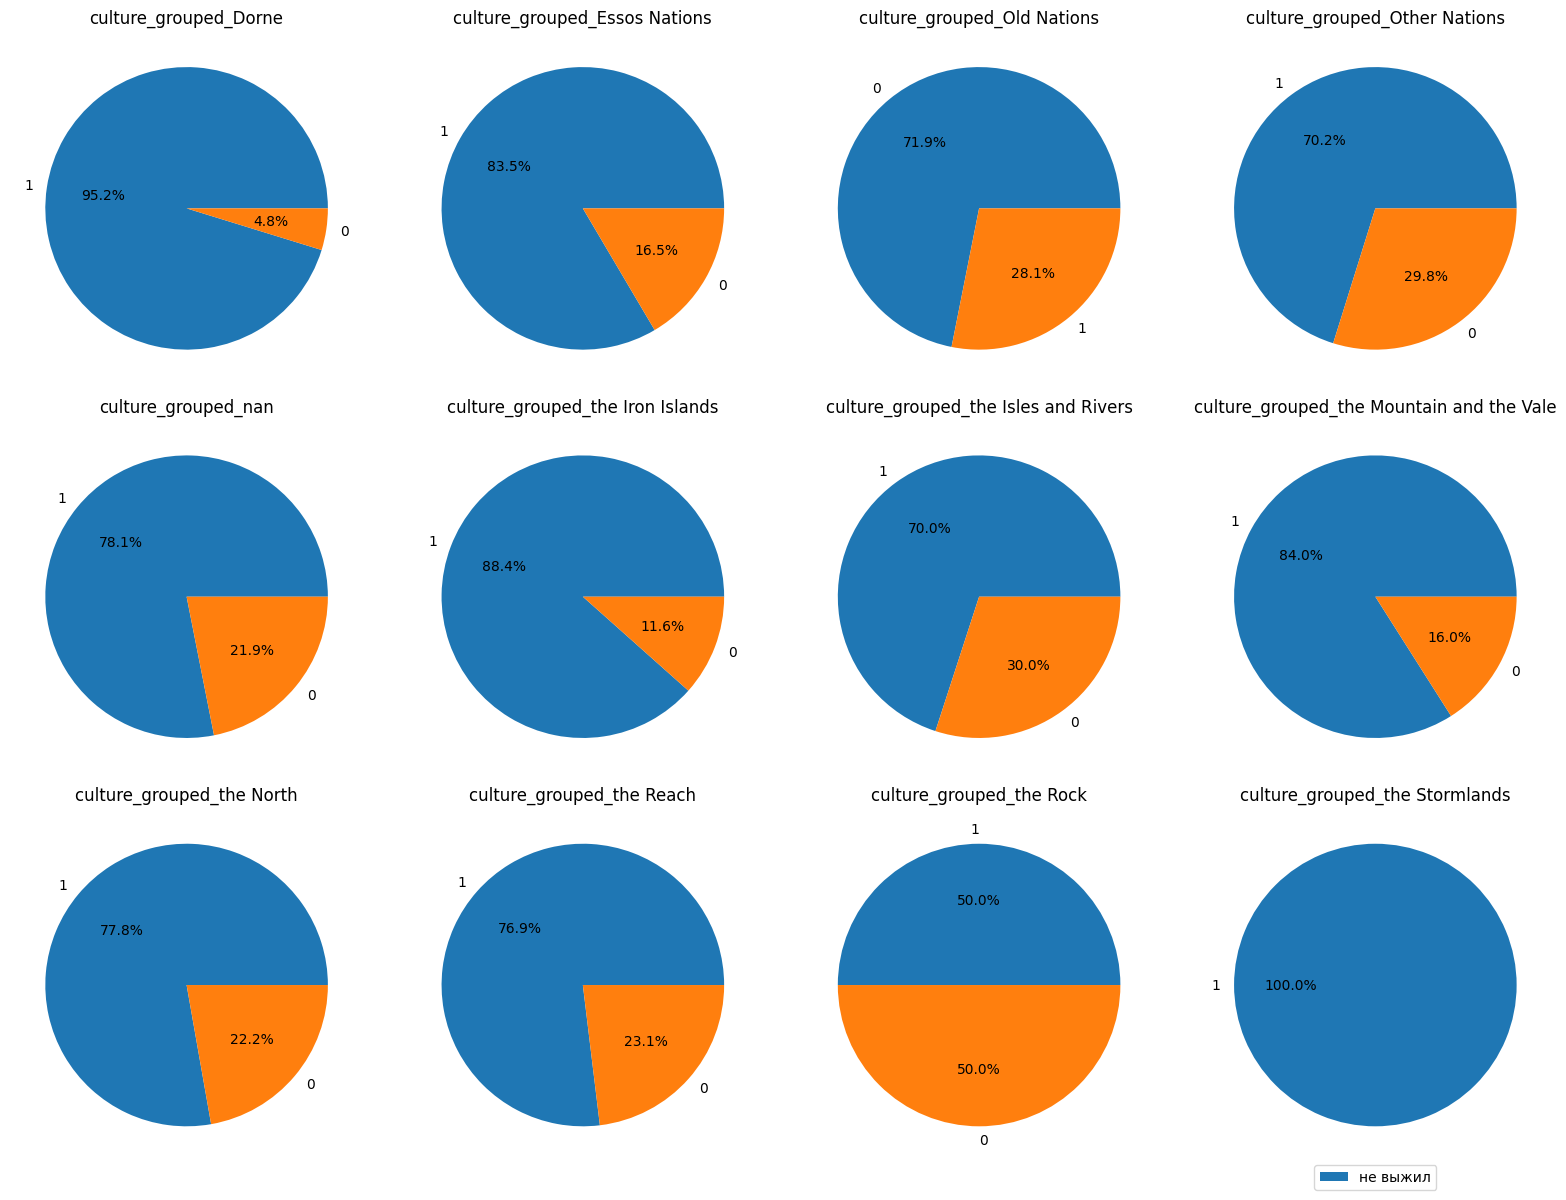

In [ ]:
# Находим все колонки, которые начинаются с "culture_grouped"
title_columns = [col for col in data_encoded.columns if re.match(r'^culture_grouped', col)]

# Сортируем для единообразия (опционально)
title_columns.sort()

# Определяем layout для subplots
n = len(title_columns)
cols = 4  # Количество колонок в сетке графиков
rows = (n + cols - 1) // cols  # Вычисляем необходимое количество строк

# Создаем subplots
fig, axes = plt.subplots(rows, cols, figsize=(4*cols, 4*rows))

# Если axes не является массивом (когда rows=1), преобразуем в массив для единообразия
if rows == 1:
    axes = [axes]
if cols == 1:
    axes = [[ax] for ax in axes]

# Строим круговые диаграммы для каждого title_ признака
for i, title_col in enumerate(title_columns):
    row_idx = i // cols
    col_idx = i % cols

    # Получаем данные для текущего title_
    data = data_encoded[data_encoded[title_col] == 1]['isAlive'].value_counts()

    # Строим круговую диаграмму
    axes[row_idx][col_idx].pie(data.values, labels=data.index, autopct='%1.1f%%')
    axes[row_idx][col_idx].set_title(title_col)

# Скрываем пустые subplots, если они есть
for i in range(len(title_columns), rows * cols):
    row_idx = i // cols
    col_idx = i % cols
    axes[row_idx][col_idx].set_visible(False)

# Добавляем легенду
plt.legend(['не выжил', 'выжил'], loc='lower center', bbox_to_anchor=(0.5, -0.1))

plt.tight_layout()
plt.show()

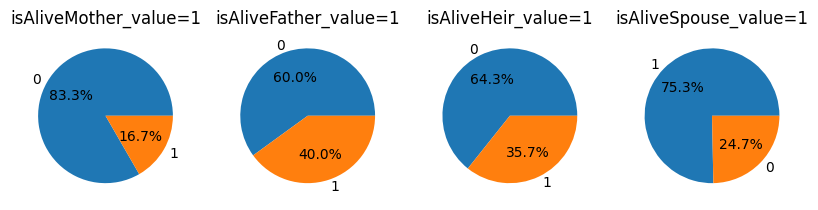

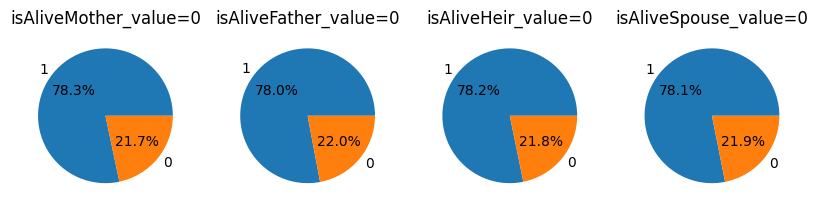

In [ ]:
# Готовим данные для графика
data1 = data_encoded[data_encoded['isAliveMother_value'] == 1]['isAlive'].value_counts()
data2 = data_encoded[data_encoded['isAliveFather_value'] == 1]['isAlive'].value_counts()
data3 = data_encoded[data_encoded['isAliveHeir_value'] == 1]['isAlive'].value_counts()
data4 = data_encoded[data_encoded['isAliveSpouse_value'] == 1]['isAlive'].value_counts()

data5 = data_encoded[data_encoded['isAliveMother_value'] == 0]['isAlive'].value_counts()
data6 = data_encoded[data_encoded['isAliveFather_value'] == 0]['isAlive'].value_counts()
data7 = data_encoded[data_encoded['isAliveHeir_value'] == 0]['isAlive'].value_counts()
data8 = data_encoded[data_encoded['isAliveSpouse_value'] == 0]['isAlive'].value_counts()

# Строим круговую диаграмму
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(10,8))
# Строим круговую диаграмму
fig, (ax5, ax6, ax7, ax8) = plt.subplots(1, 4, figsize=(10,8))

ax1.pie(data1.values, labels=data1.index, autopct='%1.1f%%')
ax2.pie(data2.values, labels=data2.index, autopct='%1.1f%%')
ax3.pie(data3.values, labels=data3.index, autopct='%1.1f%%')
ax4.pie(data4.values, labels=data4.index, autopct='%1.1f%%')

ax5.pie(data5.values, labels=data5.index, autopct='%1.1f%%')
ax6.pie(data6.values, labels=data6.index, autopct='%1.1f%%')
ax7.pie(data7.values, labels=data7.index, autopct='%1.1f%%')
ax8.pie(data8.values, labels=data8.index, autopct='%1.1f%%')

ax1.set_title("isAliveMother_value=1")
ax2.set_title("isAliveFather_value=1")
ax3.set_title("isAliveHeir_value=1")
ax4.set_title("isAliveSpouse_value=1")
ax5.set_title("isAliveMother_value=0")
ax6.set_title("isAliveFather_value=0")
ax7.set_title("isAliveHeir_value=0")
ax8.set_title("isAliveSpouse_value=0")

plt.show()

In [ ]:
# эти признаки оказывают незначительное влияние
# экспериментальным методом удалось понять, что при их дропе модель показывает лучшую точность
data_encoded.drop(columns=[
'isAliveSpouse_value',
'isAliveSpouse_no_data',
'isAliveHeir_value',
'isAliveHeir_no_data',
'isAliveFather_value',
'isAliveFather_no_data',
'isAliveMother_value',
'isAliveMother_no_data'], inplace=True)

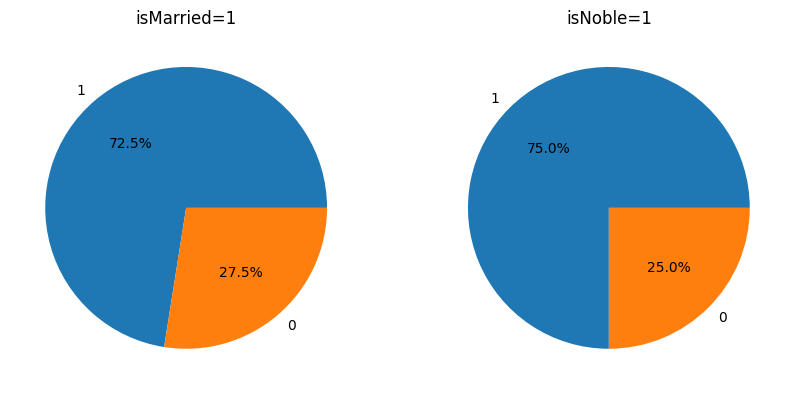

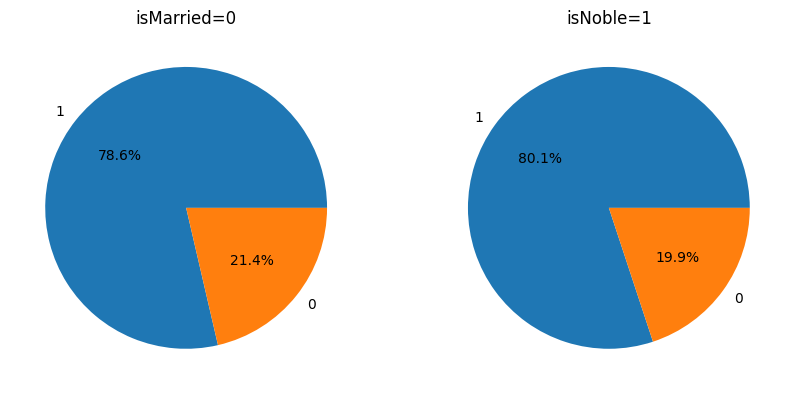

In [ ]:
# Готовим данные для графика
data1 = data_encoded[data_encoded['isMarried'] == 1]['isAlive'].value_counts()
data2 = data_encoded[data_encoded['isNoble'] == 1]['isAlive'].value_counts()
data3 = data_encoded[data_encoded['isMarried'] == 0]['isAlive'].value_counts()
data4 = data_encoded[data_encoded['isNoble'] == 0]['isAlive'].value_counts()

# Строим круговую диаграмму
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,8))
# Строим круговую диаграмму
fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(10,8))

ax1.pie(data1.values, labels=data1.index, autopct='%1.1f%%')
ax2.pie(data2.values, labels=data2.index, autopct='%1.1f%%')
ax3.pie(data3.values, labels=data3.index, autopct='%1.1f%%')
ax4.pie(data4.values, labels=data4.index, autopct='%1.1f%%')

ax1.set_title("isMarried=1")
ax2.set_title("isNoble=1")
ax3.set_title("isMarried=0")
ax4.set_title("isNoble=1")

plt.show()

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, которые вы отобрали для включения в модель, и `y`, которая будет хранить только значения целевой переменной.

In [ ]:
X = data_encoded.drop(['isAlive'], axis=1)
y = data_encoded['isAlive']

**Задание 1.10.** Разделите датасет обучащую и валидационные части (train и val) при помощи функции `train_test_split` (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# не забудьте в функции train_test_split задать параметр random_state,
# чтобы обеспечить повторяемость разбиения выборки на train и validation части.
# Это позволит сравнивать метрики моделей с различными методами подготовки признаков
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, shuffle=True, test_size=0.2, random_state=44)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.**


Вым можете работать с одно из предложенных моделей из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


Однако в этом домашнем задании мы предлагаем выбрать и поработать с моделью `LogisticRegression`.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [ ]:
# Шаг 1. создание модели
logreg = LogisticRegression(max_iter=1000, penalty='l2', solver='saga')

# Шаг 2. обучение модели
logreg.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = logreg.predict(X_test)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [ ]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [ ]:
# Шаг 3. Предсказание на тестовых данных

y_val = y_test

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8173


Возможно, вы решите вернуться на несколько шагов и попробовать другие варианты преобразования и подбора признаков в модель. **Выберите** лучшую модель.

### Тестовый датасет

В самом начале нашего домашнего задания мы скачивали тестовый датасет. Загрузите его в Pandas DataFrame при помощи функции read_csv

In [ ]:
data_test = pd.read_csv('/content/game_of_thrones_test.csv', index_col='S.No')

По аналогии с тем, как мы работали с обучающим датасетом, давайте посмотрим в тестовом датасете на статистики признаков с разными типами данных  

In [ ]:
#Подсказка
data_test.loc[data_test['age']<0] # Находим данные с ошибками в дате рождения и возрасте

name title  male culture  dateOfBirth mother father heir  \
S.No                                                               
1685  Doreah   NaN     0  Lysene     278279.0    NaN    NaN  NaN   
1869  Rhaego   NaN     0     NaN     298299.0    NaN    NaN  NaN   

                house spouse  ...  book5  isAliveMother  isAliveFather  \
S.No                          ...                                        
1685  House Targaryen    NaN  ...      1            NaN            NaN   
1869  House Targaryen    NaN  ...      0            NaN            NaN   

      isAliveHeir  isAliveSpouse  isMarried  isNoble       age  \
S.No                                                             
1685          NaN            NaN          0        0 -277980.0   
1869          NaN            NaN          0        0 -298001.0   

      numDeadRelations  popularity  
S.No                                
1685                 0    0.110368  
1869                 6    0.167224  

[2 rows x 24 columns]

In [ ]:
#Вы можете аккуратно поправить тестовые данные, воспользовавшись, например следующим кодом:
data_test.loc[1685, 'dateOfBirth'] = 278.
data_test.loc[1685, 'age'] = 0.

data_test.loc[1869, 'dateOfBirth'] = 299.
data_test.loc[1869, 'age'] = 0.
# замены в строке 1685: dateOfBirth -> 278. и age -> 0.
# замены в строке 1869: dateOfBirth -> 299. и age -> 0.

Преобразуйте признаки в тестовом датасете по тому же пайплайну, как вы преобразовывали обучающие данные. Примените вашу лучшую модель на тестовом датасете для получения прогноза целевой переменной `isAlive`

In [ ]:
# применяем все то же самое, что и для треин дата

data_test['boolDeadRelations'] = [1 if x != 0 else 0 for x in data_test['numDeadRelations']]

data_test['age_value'] = [0 if np.isnan(x) else x for x in data_test['age']]
data_test['age_no_data_test'] = [1 if np.isnan(x) else 0 for x in data_test['age']]

data_test['culture_grouped'] = data_test['culture'].str.lower().map(cultures_grouped_inverted)

data_test['culture_no_data_test'] = [1 if x is np.nan else 0 for x in data_test['culture']]

categorical_columns = ['house', 'title', 'culture_grouped']

categorical_features = data_test[categorical_columns]

unprocessed_cat_features = categorical_features.select_dtypes(include=[object]).columns.tolist()

encoder = OneHotEncoder(sparse_output=False)

one_hot_encoded = encoder.fit_transform(data_test[unprocessed_cat_features])

one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(unprocessed_cat_features), index=data_test.index)

data_test_encoded = pd.concat([data_test, one_hot_df], axis=1)
data_test_encoded = data_test_encoded.drop(unprocessed_cat_features, axis=1)

data_test_encoded.drop(columns=['numDeadRelations', 'age', 'culture', 'dateOfBirth'], inplace=True)

data_test_encoded.drop(columns=['mother', 'father', 'heir', 'spouse', 'name'], inplace=True)

data_test_encoded.drop(columns=['isAliveSpouse', 'isAliveHeir', 'isAliveMother','isAliveFather'], inplace=True)

In [ ]:
# здесь мы добавляем в data_test_encoded недостающих столбцов для корректной работы модельки
# p s их недостает, так как house, culture_group и др категориальных признаков в тестовой выборке оказалось
# меньше, чем в обучающей
data_encoded.drop(columns=['isAlive'], inplace=True)

missing_columns = list(set(data_encoded.columns) - set(data_test_encoded.columns))

# Добавляем столбцы с нулями
data_test_encoded[missing_columns] = 0

# Сортируем столбцы как в data_encoded
data_test_encoded = data_test_encoded[data_encoded.columns]

/tmp/ipython-input-967891368.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_test_encoded[missing_columns] = 0
/tmp/ipython-input-967891368.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_test_encoded[missing_columns] = 0
/tmp/ipython-input-967891368.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newfram

In [ ]:
X = data_test_encoded

In [ ]:
y_pred = logreg.predict(X)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [ ]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 13.9MB/s]


In [ ]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [ ]:
submission['isAlive']

S.No
1558    0
1559    0
1560    0
1561    0
1562    0
       ..
1942    0
1943    0
1944    0
1945    0
1946    0
Name: isAlive, Length: 389, dtype: int64

In [ ]:
len(y_pred)

389

In [ ]:
submission['isAlive'] = y_pred

In [ ]:
submission

isAlive
S.No         
1558        0
1559        1
1560        1
1561        1
1562        1
...       ...
1942        1
1943        1
1944        1
1945        1
1946        1

[389 rows x 1 columns]

Как сохранить измененный Pandas DataFrame в csv файл:

In [ ]:
submission.to_csv("/content/new_submission.csv", index=False)

итог со степика - Accuracy вашего решения равен 0.7095115681233933. Это дает вам 5.0 баллов